Відрізок 1:
S_0(x) = 1.36 + -2.4291(x - 1.2) + 0.0000(x - 1.2)^2 + 34.4768(x - 1.2)^3, x належить [1.2, 1.4]
Відрізок 2:
S_1(x) = 1.15 + 1.7081(x - 1.4) + 20.6861(x - 1.4)^2 + -43.8588(x - 1.4)^3, x належить [1.4, 1.7]
Відрізок 3:
S_2(x) = 2.34 + 2.2779(x - 1.7) + -18.7869(x - 1.7)^2 + 18.4099(x - 1.7)^3, x належить [1.7, 2.3]
Відрізок 4:
S_3(x) = 0.92 + -0.3837(x - 2.3) + 14.3510(x - 2.3)^2 + -9.5673(x - 2.3)^3, x належить [2.3, 2.8]
Значення сплайна у точках:
0 x = 1.20, y = 1.360
1 x = 1.22, y = 1.268
2 x = 1.23, y = 1.192
3 x = 1.25, y = 1.131
4 x = 1.26, y = 1.084
5 x = 1.28, y = 1.051
6 x = 1.30, y = 1.031
7 x = 1.31, y = 1.023
8 x = 1.33, y = 1.026
9 x = 1.35, y = 1.039
10 x = 1.36, y = 1.062
11 x = 1.38, y = 1.094
12 x = 1.39, y = 1.133
13 x = 1.41, y = 1.180
14 x = 1.43, y = 1.233
15 x = 1.44, y = 1.292
16 x = 1.46, y = 1.356
17 x = 1.47, y = 1.424
18 x = 1.49, y = 1.494
19 x = 1.51, y = 1.568
20 x = 1.52, y = 1.643
21 x = 1.54, y = 1.718
22 x = 1.56, y = 1.794
23 x = 1.57, y 

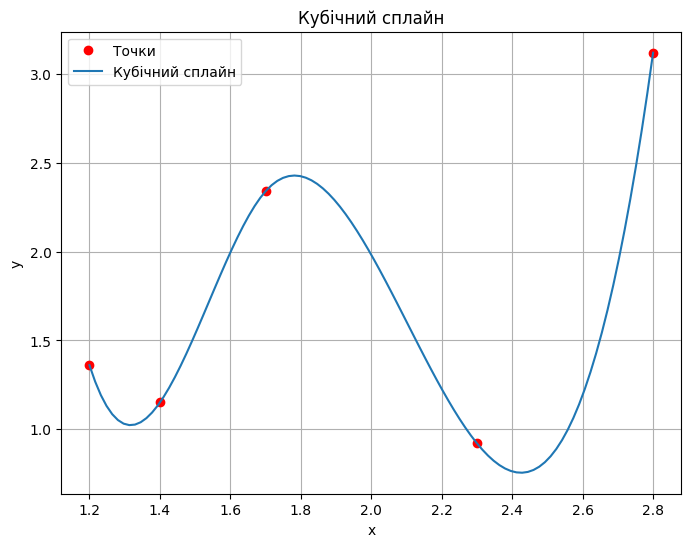

In [35]:
import numpy
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x = numpy.array([1.2, 1.4, 1.7, 2.3, 2.8])
y = numpy.array([1.36, 1.15, 2.34, 0.92, 3.12])

n = len(x)
h = numpy.diff(x)
a = y
b = numpy.zeros(n)
d = numpy.zeros(n)
c = numpy.zeros(n)
alpha = numpy.zeros(n)

for i in range(1, n - 1):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = numpy.ones(n)
mu = numpy.zeros(n)
z = numpy.zeros(n)

for i in range(1, n - 1):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

for i in range(n - 1):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i]:.4f}(x - {x[i]}) + {c[i]:.4f}(x - {x[i]})^2 + {d[i]:.4f}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

cs = CubicSpline(x, y)

x_new = numpy.linspace(numpy.min(x), numpy.max(x), 100)
y_new = cs(x_new)

print("Значення сплайна у точках:")
for i in range(len(x_new)):
    print(f"{i} x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', c="r", label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()
